# Social Media Analytics
## School of Information, University of Michigan

## Week 3: Social Media Networks
 
- Network statistics in social media networks

## Assignment Overview
### The objective of this assignment is to:

- Load a network based on user mentions
- Plot and analyze network metrics

### The total score of this assignment will be 100 points consisting of:

- `load_graph` function: 2 points
- `basic_graph_attrs` function: 3 points
- `plot_degree_distribution`: 10 points
- interpretation of degree distributions: 10 points
- `top_10_degree_centrality` function: 10 points
- `top_10_closeness_centrality` function: 10 points
- `top_10_betweenness_centrality` function: 10 points
- interpretation of centrality: 15 points
- `largest_component_size` function: 10 points
- `largest_component_diameter` function: 10 points
- `largest_component_avg_sortest_path` function: 10 points

### Resources:

- [Tweepy API documentation](https://tweepy.readthedocs.io/en/latest/) 
- [Trump tweet corpus](https://www.thetrumparchive.com/) 

## Instructions: 
In this assignment, you will use the provided tweet corpus to plot and analyze network metrics, such as centrality. You will create visualizations and interpret the data. 

**Note:** A number of the commands will take a long time to process, even on the server resources provided to you. A common and useful strategy is to hardcode once you get the correct answer for the autograder.

### Notes on the network:

- We created a network based on the Tweets in the account [@realDonaldTrump](https://twitter.com/realDonaldTrump)
- Note that the network contains some self-referential edges (i.e., @realDonaldTrump appears in the network). This is due to earlier uses of the RT syntax, or due to quoted RTs including the source account name.
- We provide a weighted, undirected network where:
    - Each node is the user handle of a Twitter user that was mentioned by @realDonaldTrump (which could be himself)
    - A link exists every time two users are mentioned on the same tweet
    - The weight between two links is the number of times users are mentioned together
- **You can find the script to create the network on assets/create_nw/create_network.py**
    - This script uses a pandas dataframe of user_mentions based on the tweets of @realDonaldTrump from 05/2009 to 01/2018
    - However, it is not necessary for you to understand this pre-processing script to complete this assignment.

In [1]:
import networkx as nx

def load_graph():
    """
    2 points 
    Load the assets/trump__2009_05-2018_01_network_weghted.gpickle file using networkx
    """
    G = nx.read_gpickle("assets/trump__2009_05-2018_01_network_weghted.gpickle")
    # YOUR CODE HERE
    #raise NotImplementedError()
    return G

def basic_graph_attrs(G):
    """ 
    3 points 
    Return a tuple with the following graph attributes in the same order
        - number of nodes
        - number of edges
        - average degree
    """
    num_nodes = len(G.nodes)
    num_edges = len(G.edges)
    degrees = G.degree
    degs = []
    for i in degrees:
        degs.append(i[1])
        avg_deg = sum(degs)/len(degs)
    return (num_nodes, num_edges, avg_deg)

    # YOUR CODE HERE
    #raise NotImplementedError()

In [2]:
import networkx as nx

G = load_graph()
attrs = basic_graph_attrs(G)
assert type(G) == nx.classes.graph.Graph, "load_graph, the type of the graph should be nx.classes.graph.Graph"
nodes = list(G.nodes)
for node in ['bretmichaels', 'SnoopDogg', 'IvankaTrump']:
    assert node in nodes, f"node {node} is missing"

In [3]:
attrs

(9508, 16065, 3.3792595708876734)

### Visualize the degree distribution for all nodes in the graph and for nodes with degree < 10 
<img src="assets/sample_plot_1a.png" alt="graphs showing distribution of nodes" style="width: 1000px;"/>


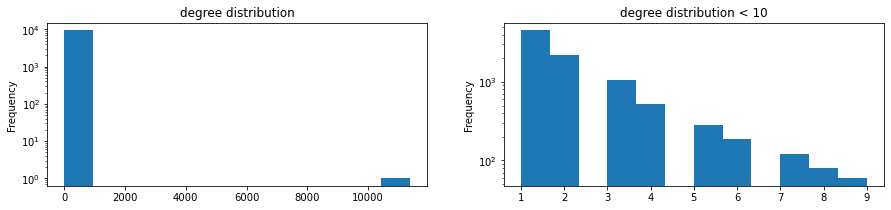

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_degree_distribution(G):
    """ 
    10 points
    Plot the degree distribution of G in two different ways.
    The left-hand degree distribution should show all nodes.
    The right-hand degree distribution should show only nodes with degree < 10.
    Both plots should use 12 bins and log scaling.
    """
    # YOUR CODE HERE
    fig, ax = plt.subplots(1,2, figsize=(15,3))

    ax[1].hist([x for x in dict(G.degree(weight="weight")).values() if x<10], bins=12)
    ax[1].set_yscale("log")
    ax[1].set_title("degree distribution < 10")
    ax[1].set_ylabel("Frequency")

    ax[0].hist(dict(G.degree(weight="weight")).values(), bins=12)
    ax[0].set_yscale("log")
    ax[0].set_title("degree distribution")
    ax[0].set_ylabel("Frequency")
    #raise NotImplementedError()
    
G = load_graph()
plot_degree_distribution(G)

### Please interpret these plots in the cell below. (10 points)

The first degree distribution plot shows nodes of very different degres, whilst the second degree distribution plot shows nodes of more similar degrees. The degree distribution does not really show a large amount of the network structure, and does not really show how the nodes are connected to one another.      

In [5]:
import networkx as nx

def top_10_degree_centrality(G):
    """ 
    10 points
    Return a list with the top 10 nodes with the highest degee centrality in descending order
    Each element of the list should be a tuple of the form (node, centrality)
    """
    return sorted(nx.degree_centrality(G).items(), key=lambda x: (x[1], x[0]), reverse=True)[:10]

def top_10_closeness_centrality(G):
    """ 
    10 points
    Return a list with the top 10 nodes with the highest closeness centrality in descending order
    Each element of the list should be a tuple of the form (node, centrality)
    """
    return sorted(nx.closeness_centrality(G).items(), key=lambda x: (x[1], x[0]), reverse=True)[:10]

def top_10_betweenness_centrality(G):
    """ 
    10 points
    Return a list with the top 10 nodes with the highest betweenness centrality in descending order
    Each element of the list should be a tuple of the form (node, centrality)
    """
    return sorted(nx.betweenness_centrality(G).items(), key=lambda x: (x[1], x[0]), reverse=True)[:10]

In [6]:
import networkx as nx
import math

G = load_graph()
top_10_dc = top_10_degree_centrality(G)
top_10_cc= top_10_closeness_centrality(G)
top_10_bc = top_10_betweenness_centrality(G)

assert top_10_dc[0][0] == 'realDonaldTrump', 'top_10_degree_centrality, realDonaldTrump should be the node with highest degree centrality'
assert top_10_cc[0][0] == 'realDonaldTrump', 'top_10_closeness_centrality, realDonaldTrump should be the node with highest closeness centrality'
assert top_10_bc[0][0] == 'realDonaldTrump', 'top_10_betweenness_centrality, realDonaldTrump should be the node with highest betweenness centrality'


### Write your interpretation of the different centralities, what does each centrality tell you about the nodes with the highest value? (15 points)

Each centrality with nodes with the highest value tells me that the more central the node is, the higher the degree is. Degree centrality basically shows how many connections are related to the vertex, kind of like a popularity measure.  

In [7]:
import networkx as nx


def largest_component_size(G):
    """
    10 points
    return the size of the largest connected component in the graph
    """
    largest_cc_size = len(max(nx.connected_components(G), key=len))
    return largest_cc_size

def largest_component_diameter(G):
    """
    10 points
    return the diameter of the largest connected component in the graph
    HINT: G.subgraph(component) will return a graph
    """
    component = max(nx.connected_components(G), key=len)
    diameter = nx.diameter(G.subgraph(component))
    return diameter

def largest_component_avg_sortest_path(G):
    """
    10 points
    return the average shortest path length of the largest connected component in the graph
    HINT: G.subgraph(component) will return a graph
    """
    component = max(nx.connected_components(G), key=len)
    avg_shot_path = nx.average_shortest_path_length(G.subgraph(component))
    return avg_shot_path

In [8]:
import networkx as nx

G = load_graph()
lg_size = largest_component_size(G)
lg_diam = largest_component_diameter(G)
lg_avg_sp = largest_component_avg_sortest_path(G)
